# Lab Demonstration - Decision Tree
****

Classification trees are popular because they are transparent, straightforward and easy to understand how they produce the predictions. They can be used for regression or classification tasks. They produce the predictions by creating a series of rules that applied consecutively until they arrive at a "leaf" node in the tree that contains the classification.

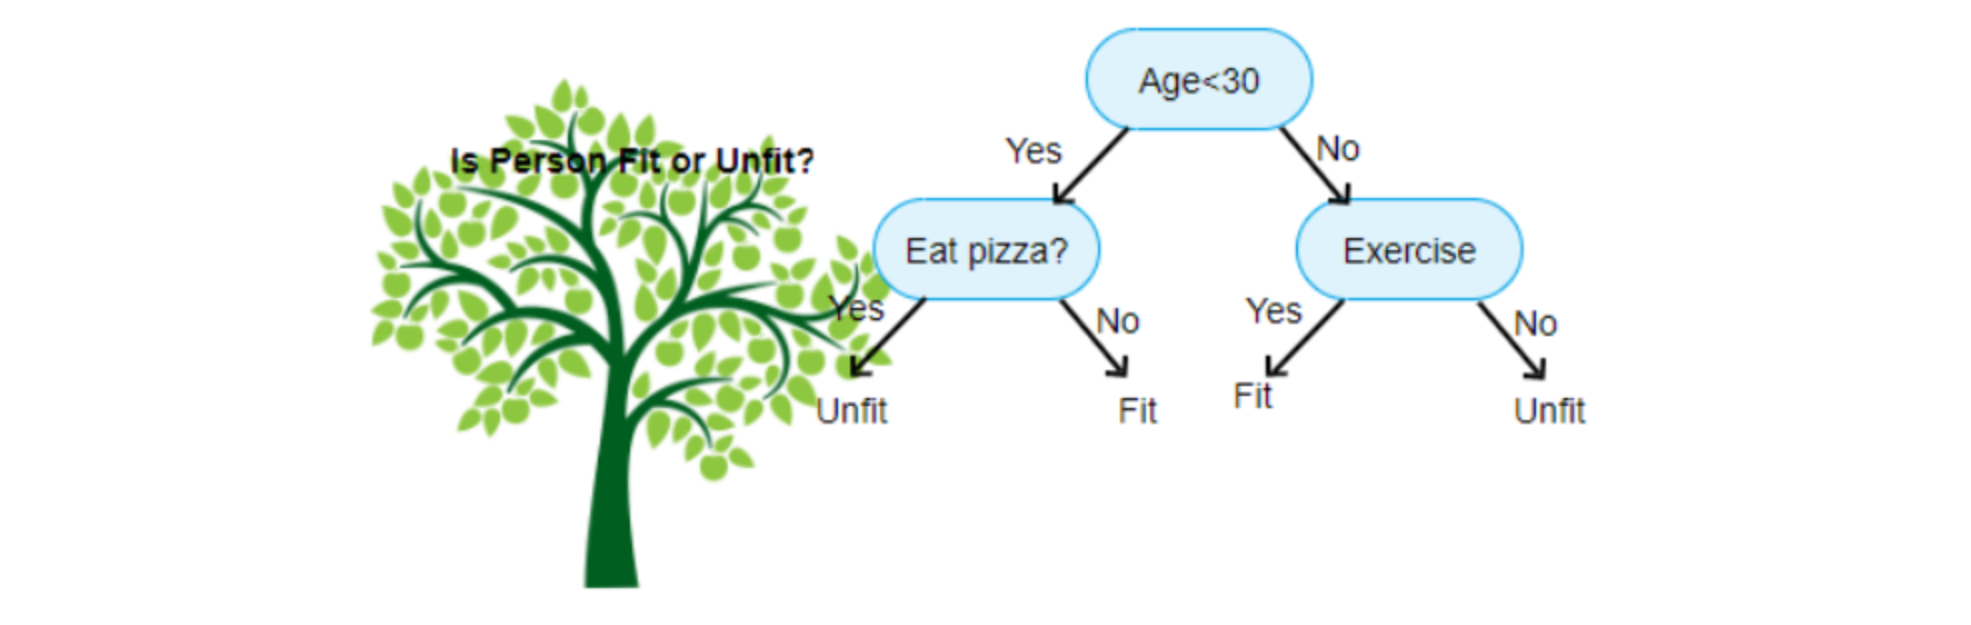


## Decision Tree Classifier

### Defining Dataset

Let's create a dataset with two features (in blue ) and one label (in orange) that contain a record of weather, temperature and the decision to play tennis from the past 14 days. This dataset will be used to build a model to predict whether the weather and temperature today is suitable for you to play a tennis match outdoor. 

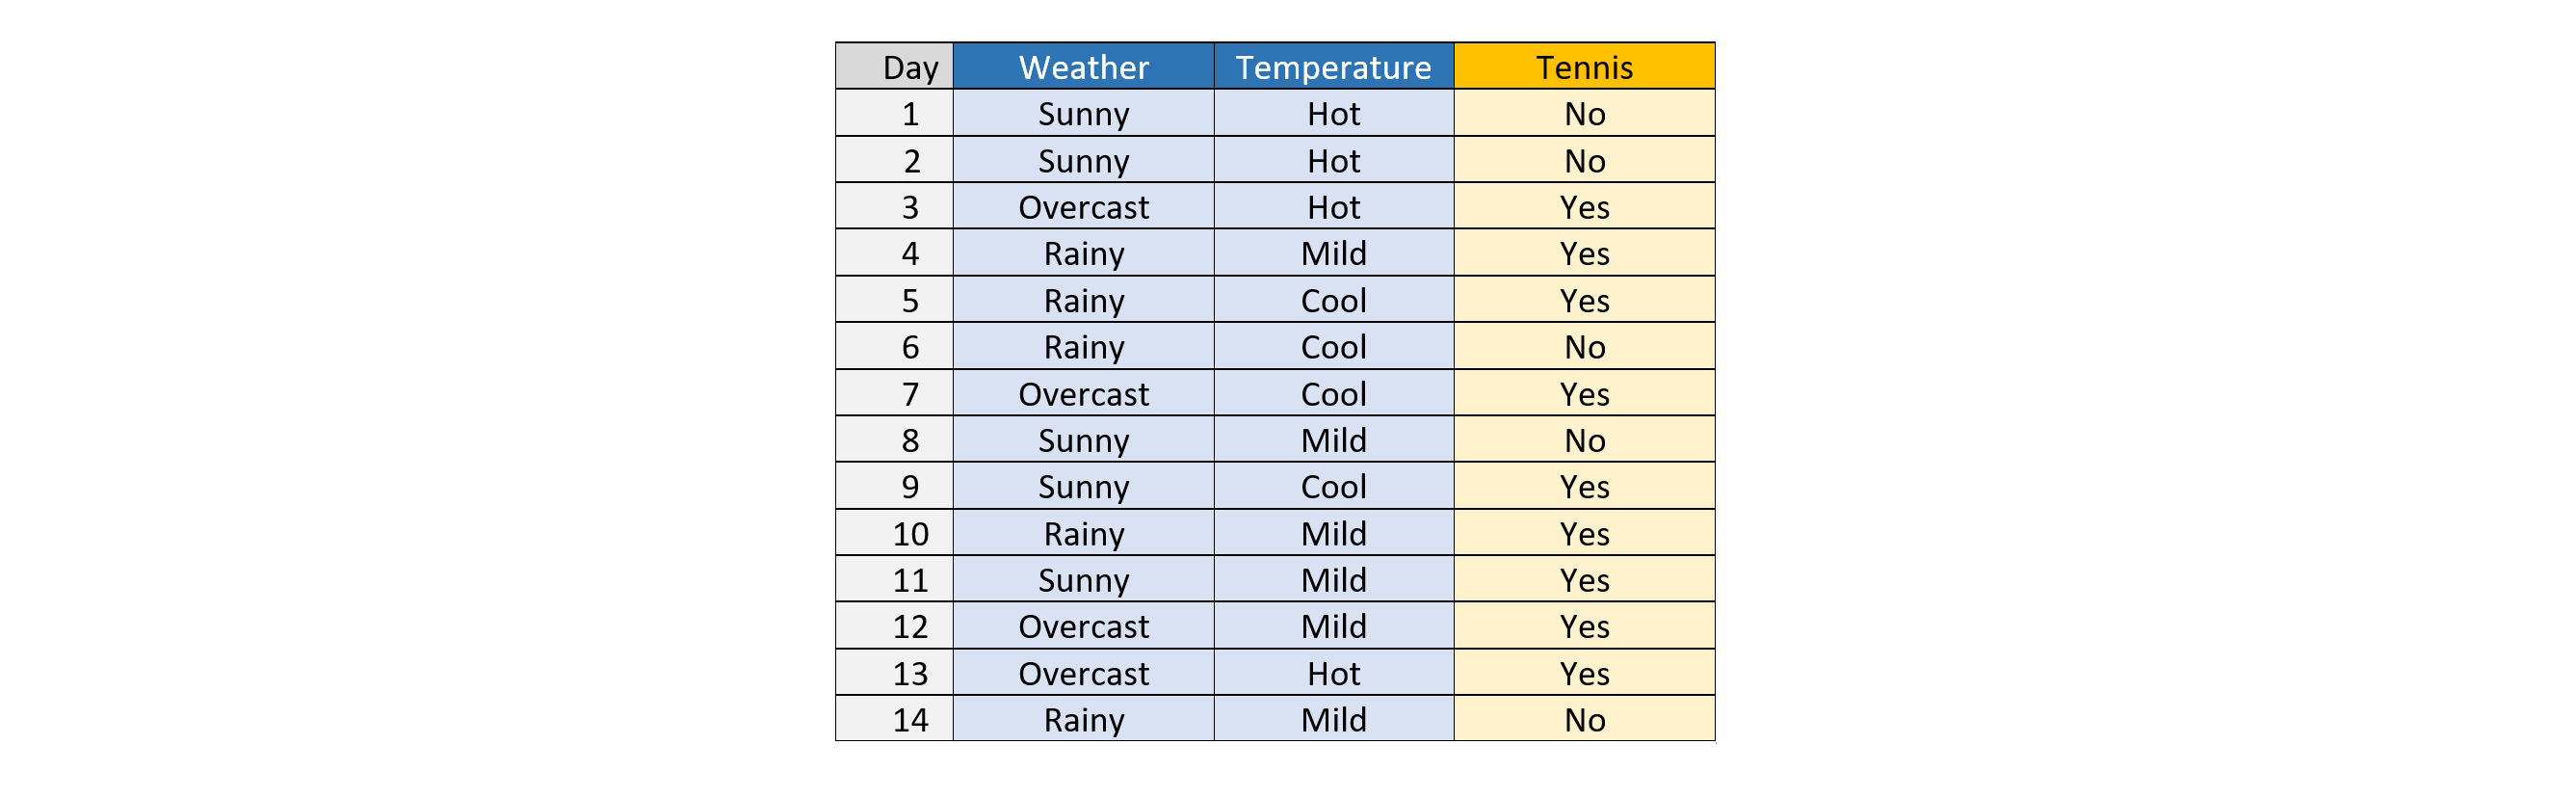


In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

In [ ]:
ROOT_DIR = '/content/drive/MyDrive/C379'

In [34]:
# First Feature
weather = ['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']

# Second Feature
temp = ['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

# Label or target varible
tennis = ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']


### Encoding data columns

Various machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column.

In order to encode this data, you could map each value to a number. e.g. Overcast:0, Rainy:1, and Sunny:2.

This process is known as label encoding, and $sklearn$ conveniently will do this for you using $Label Encoder$.


In [35]:
# Importing preprocessing library
from sklearn import preprocessing

# Creating a labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
weather_encoded = le.fit_transform(weather)
print (weather_encoded)


[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


Here, you have imported preprocessing module and created Label Encoder object. Using this $LabelEncoder$ object, you can fit and transform "weather" column into the numeric column. Similarly, you can encode temperature and label into numeric columns.


In [36]:
# Converting string labels into numbers
temp_encoded = le.fit_transform(temp)
label = le.fit_transform(tennis)


### Combining Features

You can combine multiple columns or features into a single set of data using "zip" function.


In [37]:
# Combining weather and temp into a single list of tuples
features = list(zip(weather_encoded, temp_encoded))


### Generating Model

Let's build Decision Tree classifier model.

First, import the $from sklearn.tree import DecisionTreeClassifier$ module and set the $max depth$ parameter to 3. 


In [38]:
from sklearn.tree import DecisionTreeClassifier
class_tree = DecisionTreeClassifier(max_depth=3) 
class_tree.fit(features, label)


DecisionTreeClassifier(max_depth=3)

We start vistualizing the classification tree by importing 'export_graphviz', which exports the decision tree in a file with DOT format. This function generates a GraphiViz representation of the decision tree, which is then written into 'out_file'. Finally, the image function is used to display the tree. You may refer to https://www.graphviz.org/ for more information on GraphViz. 


In [39]:
from six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus


The code to display the graphical representation is as follows: 

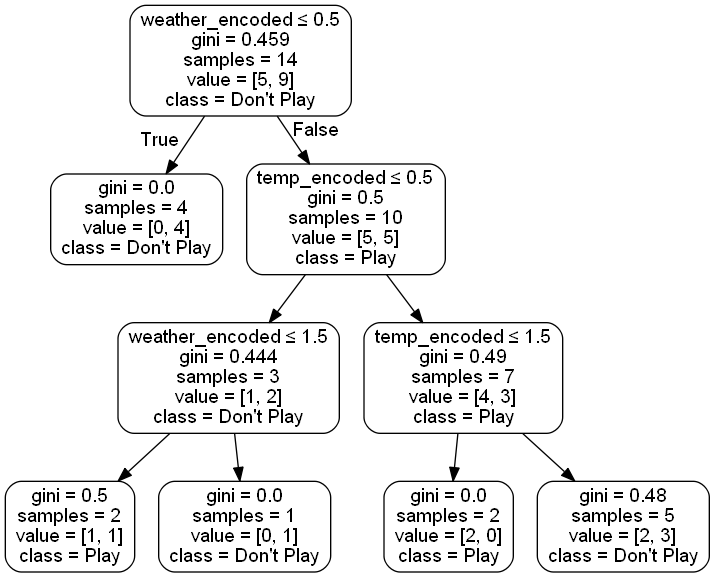

In [40]:
dot_data = StringIO()
export_graphviz(decision_tree=class_tree, 
                out_file=dot_data,
                rounded=True,
                feature_names = ("weather_encoded", "temp_encoded"), 
                class_names = ["Play", "Don't Play"],
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


The above diagram generated is the graphical representation of the rules produced by the $Decision Tree$ model. For every observation, start at the top and based on the truth value of the proposition, go left if it is True and right if it is False. Suppose you have the data for one observation, then you start answering in the following sequence:

1. Is weather_encoded <= 0.5? Go right if the answer is False
2. Is temp_encoded <011.5? Go left if the answer is True
3. Is weather_encoded <= 1.5? If the answer is False, go right and predict that the weather and temperature is bad, so you may advice the players not to play tennis.

Next, you may find it more useful to print the 'proportions' instead of the 'counts' by setting the parameter for $proportion=True$. 

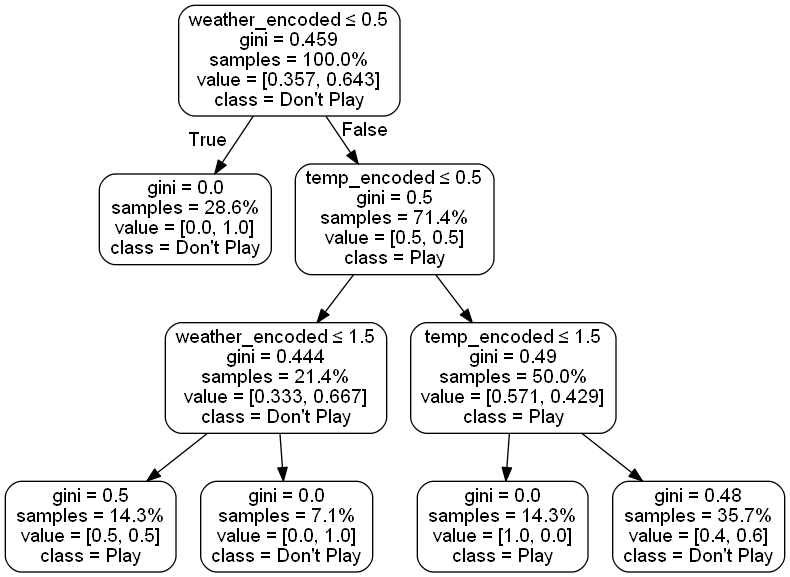

In [41]:
dot_data = StringIO()
export_graphviz(decision_tree=class_tree, 
                out_file=dot_data,
                rounded=True,
                proportion=True,
                feature_names = ("weather_encoded", "temp_encoded"), 
                class_names = ["Play", "Don't Play"],
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


As you can see in the leftmost leaf node, only 14.3% of the samples are 'Play', compared to the rightmost node where 35.7% are 'Don't Play'.

Let's modify your Python code by assigning the $ max depth$ of tree to 1


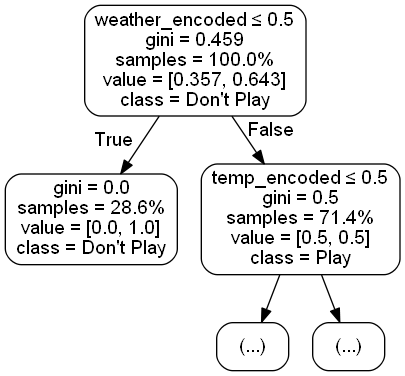

In [42]:
# Rewrite your Python code here...
dot_data = StringIO()
export_graphviz(decision_tree=class_tree, 
                max_depth=1,
                out_file=dot_data,
                rounded=True,
                proportion=True,
                feature_names = ("weather_encoded", "temp_encoded"), 
                class_names = ["Play", "Don't Play"],
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


### The Pros and Cons of using Decision Trees

#### Advantages 
- They are very easy to understand and explain
- The rules produced are easy to implement
- It is computationally efficient to produce predictions with them
- As shown above, there is very little pre-processing needed. The classification trees are not affected if the predictors are skewed (unbalanced), or being in different scales. 

#### Drawbacks
- Their predictive power is often less than that of other models. Hence, you would not expect highly accurate predictions.
- They may be unstable. For example, small changes in the dataset can lead to very different rules. 
- They can be overfit. 
- Due to the simplicity of the if-else rules, there are some complex interactions that these models cannot learn. 

You may refer to https://scikit-learn.org/stable/modules/tree.html#tree for some useful tips on practical usage.


Assume today's weather is overcast and the temperature is mild, let's test the outcome of the Decision Tree model to predict wether you should still play tennis today. 

In [43]:
# Predict the Output
predicted = class_tree.predict([[0, 2]]) # 0:Overcast, 2:Mild
print (predicted)

[1]


In the above demonstration, you have given input [0, 2], where 0 means Overcast weather and 2 means Mild temperature. The Decision Tree model has predicts [1], which means today's weather and temperature is suitable for you to play tennis.
